In [1]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url='https://wuzzuf.net/search/jobs/?a=hpb&q=machine%20learning&start=0'
page1=r.get(url)
page1

<Response [200]>

In [3]:
soup=BeautifulSoup(page1.content)

In [4]:
job_title=soup.find_all('h2',{'class':'css-m604qf'})
jobs=[job.text for job in job_title]
jobs

['Senior Machine Learning Engineer - Giza',
 'Machine Learning Interns',
 'Machine Learning Intern',
 'Machine Learning Operations Engineer',
 'Senior Machine Learning Engineer',
 'Machine Tools & CNC Sales Engineer',
 'NLP Engineer',
 'Data Scientist',
 'Data Scientist',
 'Senior Data Scientist',
 'Senior Computer Vision Engineer',
 'Data Scientist - For USA (Remotely)',
 'Data Scientist/ML Engineer',
 'Pilot Success Project Manager',
 'Graduate Research Intern']

In [5]:
companies_names=soup.find_all('a',{'class':'css-17s97q8'})
company=[comp.text.replace('-','') for comp in companies_names]
company

['AFKAR Technology ',
 'Corporatica ',
 'Talents Arena ',
 'Tahaluf Al Emarat Technical Solutions ',
 'Confidential ',
 'Confidential ',
 'Tahaluf Al Emarat Technical Solutions ',
 'Paymob Solutions ',
 'Fixed Solutions ',
 'Nana ',
 'Tech SquAd ',
 'Mobile Wave 3 ',
 'TMentors ',
 'LxT ',
 '360Imaging ']

In [22]:
locations_names=soup.find_all('span',{'class':'css-5wys0k'})
locations=[location.text for location in locations_names]
locations 

['Giza, Egypt ',
 'Cairo, Egypt ',
 'Smart Village, Giza, Egypt ',
 'Cairo, Egypt ',
 'Maadi, Cairo, Egypt ',
 'Heliopolis, Cairo, Egypt ',
 'Cairo, Egypt ',
 'Maadi, Cairo, Egypt ',
 'Sheraton, Cairo, Egypt ',
 'Sheraton, Cairo, Egypt ',
 '6th of October, Giza, Egypt ',
 'Cairo, Egypt ',
 'Maadi, Cairo, Egypt ',
 'Giza, Egypt ',
 'Dokki, Giza, Egypt ']

In [26]:
job_types=soup.find_all('span',{'class':'css-1ve4b75 eoyjyou0'})
job_type=[job_type.text for job_type in job_types]
job_type

['Full Time',
 'Internship',
 'Internship',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Full Time',
 'Internship']

In [27]:
dic={'job':jobs,'company':company,'location': locations,'Job_type':job_type}
df=pd.DataFrame(dic)
df

,job,company,location,Job_type
0,Senior Machine Learning Engineer - Giza,AFKAR Technology,"Giza, Egypt",Full Time
1,Machine Learning Interns,Corporatica,"Cairo, Egypt",Internship
2,Machine Learning Intern,Talents Arena,"Smart Village, Giza, Egypt",Internship
3,Machine Learning Operations Engineer,Tahaluf Al Emarat Technical Solutions,"Cairo, Egypt",Full Time
4,Senior Machine Learning Engineer,Confidential,"Maadi, Cairo, Egypt",Full Time
5,Machine Tools & CNC Sales Engineer,Confidential,"Heliopolis, Cairo, Egypt",Full Time
6,NLP Engineer,Tahaluf Al Emarat Technical Solutions,"Cairo, Egypt",Full Time
7,Data Scientist,Paymob Solutions,"Maadi, Cairo, Egypt",Full Time
8,Data Scientist,Fixed Solutions,"Sheraton, Cairo, Egypt",Full Time
9,Senior Data Scientist,Nana,"Sheraton, Cairo, Egypt",Full Time


In [28]:
df.to_csv('Scraping_web_for_job.csv')


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file='Scraping_web_for_job.csv'
data = pd.read_csv(csv_file)

In [31]:
data

,Unnamed: 0,job,company,location,Job_type
0,0,Senior Machine Learning Engineer - Giza,AFKAR Technology,"Giza, Egypt",Full Time
1,1,Machine Learning Interns,Corporatica,"Cairo, Egypt",Internship
2,2,Machine Learning Intern,Talents Arena,"Smart Village, Giza, Egypt",Internship
3,3,Machine Learning Operations Engineer,Tahaluf Al Emarat Technical Solutions,"Cairo, Egypt",Full Time
4,4,Senior Machine Learning Engineer,Confidential,"Maadi, Cairo, Egypt",Full Time
5,5,Machine Tools & CNC Sales Engineer,Confidential,"Heliopolis, Cairo, Egypt",Full Time
6,6,NLP Engineer,Tahaluf Al Emarat Technical Solutions,"Cairo, Egypt",Full Time
7,7,Data Scientist,Paymob Solutions,"Maadi, Cairo, Egypt",Full Time
8,8,Data Scientist,Fixed Solutions,"Sheraton, Cairo, Egypt",Full Time
9,9,Senior Data Scientist,Nana,"Sheraton, Cairo, Egypt",Full Time


ValueError: could not convert string to float: 'Senior Machine Learning Engineer - Giza'

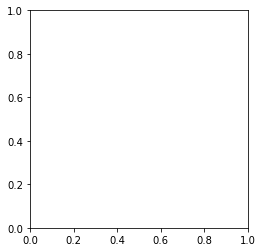

In [36]:
plt.pie(data['job'],labels=data['Job_type'],autopct='%.2f%%')